# Vinho Verde - Wine Dataset Predicting Wine Quality 
### My dataframe - Wines
#### Machine Learning - Predicting Wine Type (High, Low, Medium)

In [1]:
# Set up my wine dataset - My DataFrame

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
RW_df = pd.read_csv('winequality-red.csv', delimiter = ';')
WW_df = pd.read_csv('winequality-white.csv', delimiter = ';')

In [3]:
WW_df['type'] = 'White Wine'
RW_df['type'] = 'Red Wine'

In [4]:
df_wines = pd.concat([WW_df, RW_df])

In [5]:
def label(x):
    if (x == 8) or (x == 9) or (x == 7)  :
        return 'High'
    
    elif x in [5, 6]:
        return 'Medium'
    else:
        return 'Low'

In [6]:
df_wines['quality_label'] = df_wines['quality'].apply(lambda x: label(x))

In [7]:
df_wines['quality_label'].value_counts()

Medium    4974
High      1277
Low        246
Name: quality_label, dtype: int64

In [ ]:
# Quality levels:

                # Medium : 5 or 6 
               
               # High : 7, 8 or 9
        
              # Low : 4 or lower 

### Preprocessing

In [8]:
wqp_features = df_wines.iloc[:,:-3] # X

wqp_class_labels = np.array(df_wines['quality_label']) # y

wqp_label_names = ['Low', 'Medium', 'High'] 

wqp_feature_names = list(wqp_features.columns)

# Splitting into train and test. We need to separate out the prediction class in train and test set. 

# Here the test size is 30%.

wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features,
wqp_class_labels, test_size=0.3, random_state=42)

print(Counter(wqp_train_y), Counter(wqp_test_y))

print('Features:', wqp_feature_names)

Counter({'Medium': 3472, 'High': 898, 'Low': 177}) Counter({'Medium': 1502, 'High': 379, 'Low': 69})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [9]:
# Define the scaler

wqp_ss = StandardScaler().fit(wqp_train_X)

# Scale the train set

wqp_train_SX = wqp_ss.transform(wqp_train_X)

# Scale the test set

wqp_test_SX = wqp_ss.transform(wqp_test_X)

In [10]:
le = LabelEncoder() 

df_wines['quality_label'] = le.fit_transform(df_wines['quality_label'])

In [11]:
df_wines['quality_label'].value_counts()

2    4974
0    1277
1     246
Name: quality_label, dtype: int64

In [12]:
# ---

### Modelling

#### 1-) Decision Tree - Using the LMS codes

In [13]:
# train the model

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

In [14]:

wqp_dt = DecisionTreeClassifier()

wqp_dt.fit(wqp_train_SX, wqp_train_y)


DecisionTreeClassifier()

In [15]:
# predict and evaluate performance

wqp_dt_predictions = wqp_dt.predict(wqp_test_SX)

print(classification_report(wqp_test_y,wqp_dt_predictions, target_names=wqp_label_names))

              precision    recall  f1-score   support

         Low       0.59      0.59      0.59       379
      Medium       0.24      0.29      0.26        69
        High       0.87      0.86      0.87      1502

    accuracy                           0.79      1950
   macro avg       0.56      0.58      0.57      1950
weighted avg       0.79      0.79      0.79      1950



In [16]:
# Cohen's Kappa 

from sklearn.metrics import cohen_kappa_score


In [17]:
cohen_kappa_score(wqp_test_y,wqp_dt_predictions)

0.4335840656616273

In [18]:
# ---

#### 2-) Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
wqp_rf = RandomForestClassifier(random_state=1)

In [21]:
# Fitting the model

wqp_rf.fit(wqp_train_SX, wqp_train_y)

RandomForestClassifier(random_state=1)

In [22]:
# predict and evaluate performance

wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)

print(classification_report(wqp_test_y,wqp_rf_predictions, target_names=wqp_label_names))

              precision    recall  f1-score   support

         Low       0.79      0.55      0.65       379
      Medium       0.75      0.09      0.16        69
        High       0.86      0.96      0.91      1502

    accuracy                           0.85      1950
   macro avg       0.80      0.53      0.57      1950
weighted avg       0.84      0.85      0.83      1950



In [23]:
cohen_kappa_score(wqp_test_y,wqp_rf_predictions)

0.5255883262289847

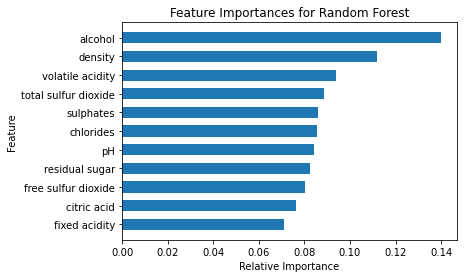

In [105]:
#  feature importance scores based on the patterns learned by the model.

wqp_rf_feature_importances = wqp_rf.feature_importances_
wqp_rf_feature_names, wqp_rf_feature_scores = zip(*sorted(zip(wqp_feature_names,
wqp_rf_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_rf_feature_names)))
plt.barh(y_position, wqp_rf_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_rf_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Random Forest')

In [76]:
# ---

#### 3-) Trying to implement AdaBoost

In [96]:

from sklearn.ensemble import AdaBoostClassifier


In [97]:
model3 = AdaBoostClassifier(random_state=1)

In [98]:
model3.fit(wqp_train_SX, wqp_train_y)

AdaBoostClassifier(random_state=1)

In [99]:
y_pred3 = model3.predict(wqp_test_SX)

In [100]:
print(classification_report(wqp_test_y, y_pred3))

              precision    recall  f1-score   support

        High       0.47      0.35      0.40       379
         Low       0.35      0.12      0.17        69
      Medium       0.82      0.89      0.85      1502

    accuracy                           0.76      1950
   macro avg       0.55      0.45      0.48      1950
weighted avg       0.73      0.76      0.74      1950



In [95]:
# ---

#### 4-) Trying to implement XGBoost

In [87]:
import xgboost as xgb

In [88]:
model4 = xgb.XGBClassifier(random_state=1)

In [103]:
model4.fit(wqp_train_SX, wqp_train_y)

y_pred4 = model4.predict(wqp_test_SX)

print(classification_report(wqp_test_y, y_pred4))

[13:42:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

        High       0.75      0.56      0.64       379
         Low       0.39      0.13      0.20        69
      Medium       0.86      0.94      0.90      1502

    accuracy                           0.84      1950
   macro avg       0.67      0.55      0.58      1950
weighted avg       0.82      0.84      0.83      1950



In [104]:
# ---